In [1]:
%load_ext autoreload
%autoreload 2

In [149]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [150]:
from cmprs.eden.linear import calc_expected_normal_bias_correction, round_to_half_int, DeltaCentroidQuantizer


In [280]:
has_zero_cluster = False
delta = 0.5

In [281]:
bias_corr = calc_expected_normal_bias_correction(has_zero_cluster=has_zero_cluster, delta=delta)
bias_corr

0.9795070093162154

In [282]:
q = DeltaCentroidQuantizer(has_zero_cluster=has_zero_cluster, delta=delta)

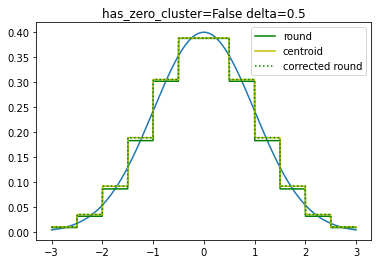

In [283]:
x = torch.linspace(-3, 3, 3000)
round_x = (np.round(x / delta) if has_zero_cluster else round_to_half_int(x / delta)) * delta
centroid_round_x = q.to_values(q.assign_clusters(x))
corr_round_x = round_x * bias_corr
plt.title(f'{has_zero_cluster=} {delta=}')
plt.plot(x, norm.pdf(x))
plt.plot(x, norm.pdf(round_x), 'g', label='round')
plt.plot(x, norm.pdf(centroid_round_x), 'y', label='centroid')
plt.plot(x, norm.pdf(corr_round_x), 'g:', label='corrected round')
plt.legend()

In [292]:
N = 50_000  # of normal samples

In [293]:
x = torch.randn(N)

In [294]:
centroid_round_x = q.to_values(q.assign_clusters(x))
round_x = (np.round(x / delta) if has_zero_cluster else round_to_half_int(x / delta)) * delta

In [295]:
centroid_round_x[:5], round_x[:5]

(tensor([ 0.7345,  0.2448,  2.6949, -0.2448,  0.2448], dtype=torch.float64),
 tensor([ 0.7500,  0.2500,  2.7500, -0.2500,  0.2500]))

In [296]:
n_vec = torch.arange(1, N + 1)

In [297]:
def cum_bias(x1, x2):
    # aka mean signed deviation
    return torch.cumsum(x1 - x2, dim=0) / n_vec

In [304]:
def plot_bias():
    start_at = N // 2
    end_at = N
    plt.title('round/centroids bias')
    plt.plot(n_vec[start_at:end_at], cum_bias(centroid_round_x, round_x)[start_at:end_at], 'g', label='no bias correction')
    plt.plot(n_vec[start_at:end_at], torch.zeros_like(n_vec)[start_at:end_at], 'y')
    plt.plot(n_vec[start_at:end_at], cum_bias(centroid_round_x, round_x * bias_corr)[start_at:end_at], 'g:',
             label='with bias correction')
    plt.ylabel('Bias (mean deviation)')
    plt.xlabel('N')
    plt.ylim(-0.0005, 0.0005)
    plt.legend()

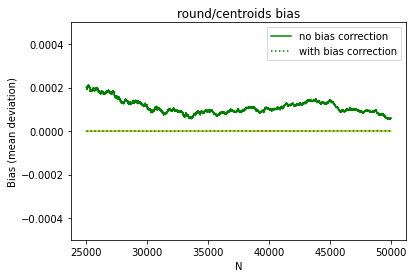

In [305]:
plot_bias()